In [1]:
################## IMPORTS #############################

## Import all neccessary libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn import cluster
from sklearn.preprocessing import scale
import seaborn as sns

## import the dataset for the project
data = pd.read_csv("datasets//HF mort data for GMPH.csv",low_memory = False)

import sys
print(sys.version)

3.8.3 (default, Jul  2 2020, 11:26:31) 
[Clang 10.0.0 ]


In [3]:
data


,id,death,los,age,gender,cancer,cabg,crt,defib,dementia,...,pacemaker,pneumonia,prior_appts_attended,prior_dnas,pci,stroke,senile,quintile,ethnicgroup,fu_time
0,1,0,2,90,2,0,0,0,0,0,...,0,0,4,0,0,0,0,2.0,NaN,416
1,2,0,10,74,1,0,0,0,0,0,...,0,1,9,1,0,0,0,4.0,1.0,648
2,3,0,3,83,2,0,0,0,0,0,...,0,0,1,0,0,0,0,3.0,1.0,466
3,4,0,1,79,1,0,0,0,0,0,...,1,0,9,2,1,1,0,5.0,1.0,441
4,5,0,17,94,2,0,0,0,0,0,...,0,0,3,0,0,0,0,2.0,1.0,371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,8,73,1,0,0,0,0,0,...,0,0,0,0,0,0,0,5.0,1.0,351
996,997,1,5,84,2,0,0,0,0,0,...,0,0,9,0,0,0,0,3.0,1.0,1030
997,998,0,3,87,1,0,0,0,0,0,...,0,0,3,0,0,0,0,4.0,1.0,15
998,999,1,62,86,2,0,0,0,0,0,...,0,1,1,0,0,0,0,2.0,1.0,339


In [3]:
## another way of calcuating percentages of nans:
for col in data.columns:
    print(col, str(round(100* data[col].isnull().sum() / len(data), 2)) + '%')

id 0.0%
death 0.0%
los 0.0%
age 0.0%
gender 0.0%
cancer 0.0%
cabg 0.0%
crt 0.0%
defib 0.0%
dementia 0.0%
diabetes 0.0%
hypertension 0.0%
ihd 0.0%
mental_health 0.0%
arrhythmias 0.0%
copd 0.0%
obesity 0.0%
pvd 0.0%
renal_disease 0.0%
valvular_disease 0.0%
metastatic_cancer 0.0%
pacemaker 0.0%
pneumonia 0.0%
prior_appts_attended 0.0%
prior_dnas 0.0%
pci 0.0%
stroke 0.0%
senile 0.0%
quintile 0.6%
ethnicgroup 4.3%
fu_time 0.0%


In [4]:
data.shape

(1000, 31)

In [4]:
################## MISSING VALUES #############################
data.isnull().any()  ## quintile and ethic group = True

nans = data.quintile.isnull().sum()
print(nans) # 6, which is 0,6%

nans = data.ethnicgroup.isnull().sum()
print(nans) # 43, which is 4,3 %

## eliminates rows with any missing values
data = data.dropna()
data.shape

6
43


(951, 31)

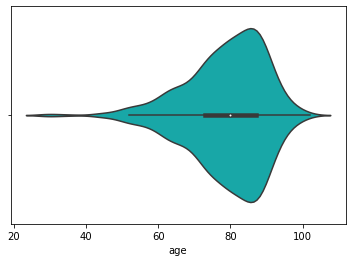

78.67402733964248


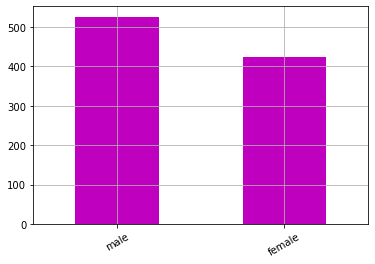

In [10]:
################## AGE AND SEX #############################

sns.violinplot(x = data.age, color = 'c')
plt.show()
print(data.age.mean())


types = ('male','female')
data.gender.value_counts().plot.bar(color = 'm',grid = True).set_xticklabels(types,rotation = 30)
plt.show()


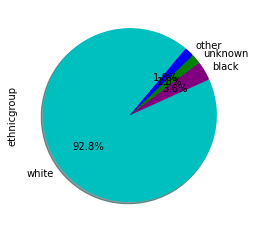

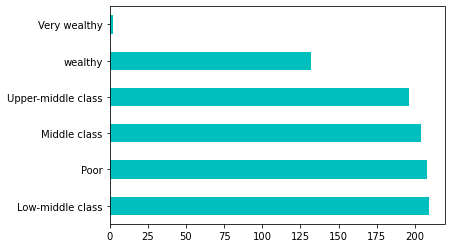

In [11]:
################## ETHNICITY and WEALTH #############################
types = ('white','black','unknown','other')
col = ('c','purple','g','b')
eth = data.ethnicgroup.value_counts()

#eth.plot.pie(labels = types,shadow=True, colors = col,startangle = 50)
eth.plot.pie(labels = types,shadow=True, colors = col,startangle = 50, autopct='%1.1f%%')
plt.show()

lab = ('Very wealthy','wealthy','Upper-middle class','Middle class','Low-middle class','Poor')
data.quintile = data.quintile.replace([0.0,1.0,2.0,3.0,4.0,5.0],lab)
data.quintile.value_counts().plot.barh(color = 'c')
plt.show()
data = pd.read_csv("datasets//HF mort data for GMPH.csv",low_memory = False)
data = data.dropna()

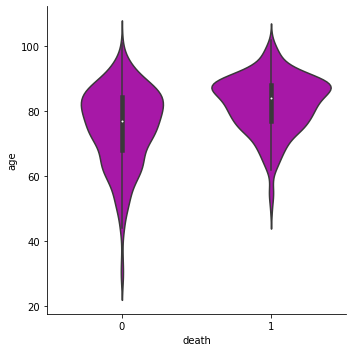

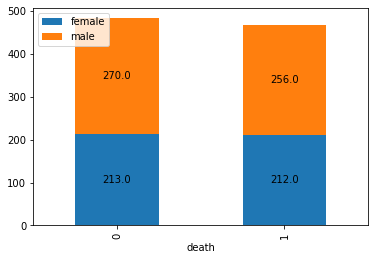

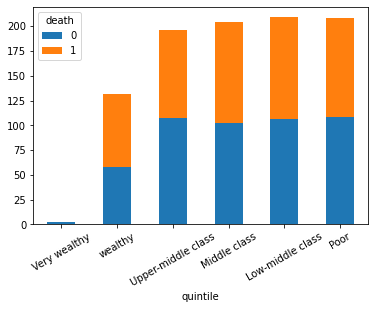

In [12]:
########## RELATION WITH HF ######################

########## age
sns.catplot(x='death', y='age', kind='violin', data=data, color ='m')
plt.show()
## las muertes se suelen acumular en los 90 años

########### gender

data.gender = data.gender.replace([1,2],['male','female'])
stackedbc = data.groupby(['death','gender']).size().unstack().plot(kind = 'bar',stacked = True)

for rect in stackedbc.patches:
    x = rect.get_x()
    y = rect.get_y()
    w = rect.get_width()
    h = rect.get_height()
    
    label_text = h
    
    labelx = x + w/2
    labely = y + h/2
    
    stackedbc.text(labelx,labely,label_text,ha = 'center',va = 'center')
    
plt.legend(loc = 'upper left')
    
plt.show()
data = pd.read_csv("datasets//HF mort data for GMPH.csv",low_memory = False)
data = data.dropna()


############# wealth


lab = ('Very wealthy','wealthy','Upper-middle class','Middle class','Low-middle class','Poor')
stackedbc = data.groupby(['quintile','death']).size().unstack().plot(kind = 'bar',stacked = True).set_xticklabels(lab,rotation = 30)



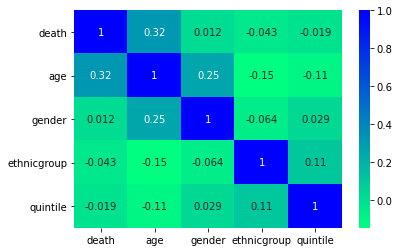

In [13]:
## correlation of death with personal features of population.

CO = data.iloc[:,[1,3,4,29,28]]
corr = CO.corr()
sns.heatmap(corr, annot = True, cmap = 'winter_r') #3"YlGnBu"
#sns.heatmap(corr,cmap = 'winter_r') #3"YlGnBu"

plt.show()

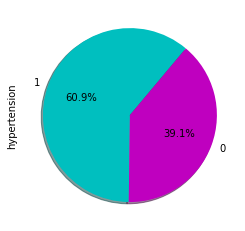

In [14]:
#types = ('white','black','unknown','other')
col = ('c','m')
x = data.hypertension[data.death == 1]
x.value_counts().plot.pie(shadow=True,colors = col,startangle = 50, autopct='%1.1f%%')
plt.show()

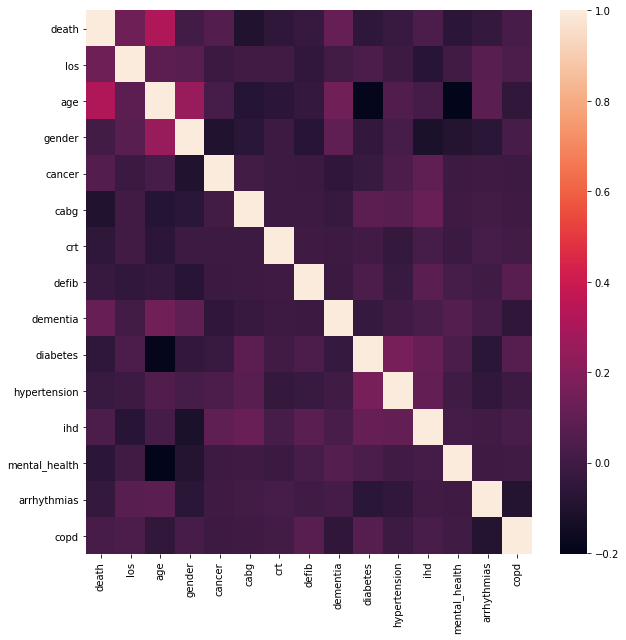

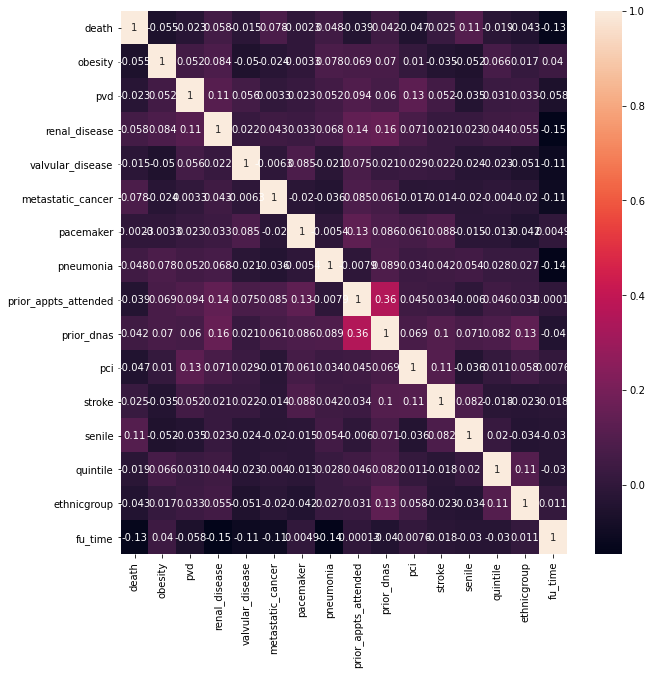

In [15]:
########### CORRELATION ###########################

## death with 1st half
FH = data.iloc[:,1:16]
corr = FH.corr()
plt.subplots(figsize=(10,10))
#sns.heatmap(corr, annot = True) ## for me to see the coefficients
sns.heatmap(corr) ## for the project, its nicer
plt.show()


## DEATH WITH 2ND HALF
SH = data.iloc[:,[1,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]]
corr = SH.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot = True)
#sns.heatmap(corr)
plt.show()




completeness score 0.10048809536988583
homogeneity score 0.0030908825837358727
silhouette score 0.6597007218232649
Max completeness score:  ['complete', 'euclidean', 0.10048809536988583, 0.0030908825837358727, 0.6597007218232649]
Max homogeneity score:  ['average', 'cosine', 0.00497654668875586, 0.004434721034637498, 0.1481675922278218]
Max silhouette score:  ['single', 'manhattan', 0.09472129025681823, 0.0020590343768992526, 0.6610184835003026]


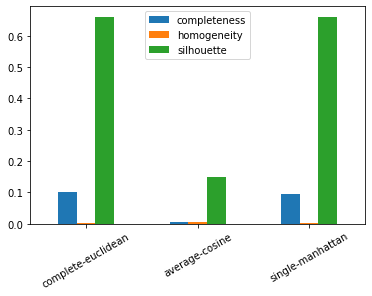

In [16]:
################## CLUSTERING #############################

## x will be the data used for clustering, everything but the class variable (death)
x = data.values[:,2:30]
#scaling data
x = scale(x)

## y will be true class variable; so we can compute metrics
y = data.values[:,1]

## define number of clusters
clusters = 2

#set characteristics of the clustering 
model = cluster.AgglomerativeClustering(n_clusters = clusters,linkage = 'complete',affinity = "euclidean")

#will generate the clusters
model.fit(x)

##compute metrics
print("completeness score", metrics.completeness_score(y,model.labels_))
print("homogeneity score", metrics.homogeneity_score(y,model.labels_))
print("silhouette score", metrics.silhouette_score(x,model.labels_))


###### dendrogram ############# no se si ponerlo porque son todos feos
from scipy.cluster.hierarchy import dendrogram,linkage

## que elijo aqui??

#model = linkage(x,'ward')
#plt.figure(figsize = (16,10))
#dendrogram(model,leaf_rotation = 90.,leaf_font_size = 8.,)
#plt.show()



################## comparison of scores based on distance and affinity measures #############################

## we will loop through the following metrics
link = (['ward','complete', 'average', 'single'])
aff = (['euclidean','manhattan', 'cosine'])

## and save results here
results = []

for i in link:
    for j in aff:
        if (i == 'ward' and aff != 'euclidean'): ## we need to make this condition because ward only works with euclidean 
            continue
        else:    
            ## build model
            model = cluster.AgglomerativeClustering(n_clusters = clusters,linkage = i,affinity = j)
            #model = cluster.AgglomerativeClustering(n_clusters = clusters,linkage = 'single',affinity = "cosine")

            #fit data to our empty model
            model.fit(x)

            c = metrics.completeness_score(y,model.labels_)
            h = metrics.homogeneity_score(y,model.labels_)
            s = metrics.silhouette_score(x,model.labels_)
            
            results.append([i,j,c,h,s])

        
## ideally, would store each value in its vector (3 vectors, one for each type of score) and the find max

## Now we find the variables that maximize each matrix

## COMPLETENESS    
MAX = []
maxV = 0 
maxI = -1
for i in range (0,len(results)):
    if (results[i][2] > maxV):
        maxV = results[i][2]
        maxI = i
      
print('Max completeness score: ', results[maxI] ) 
MAX.append(results[maxI])

##HOOGENEITY
maxV = 0 
maxI = -1
for i in range (0,len(results)):
    if (results[i][3] > maxV):
        maxV = results[i][3]
        maxI = i
        
print('Max homogeneity score: ', results[maxI] )   
MAX.append(results[maxI])

##SILHOUETTE
maxV = 0 
maxI = -1
for i in range (0,len(results)):
    if (results[i][4] > maxV):
        maxV = results[i][4]
        maxI = i
        
print('Max silhouette score: ', results[maxI] ) 
MAX.append(results[maxI])


## create dataframe
datos ={'completeness': [MAX[0][2], MAX[1][2],MAX[2][2]],
       'homogeneity' : [MAX[0][3], MAX[1][3],MAX[2][3]],
       'silhouette'  : [MAX[0][4], MAX[1][4],MAX[2][4]] }

frame = pd.DataFrame(datos)
nombres = ('complete-euclidean','average-cosine','single-manhattan')
frame.plot.bar().set_xticklabels(nombres,rotation = 30)
plt.show()

## the first group maximizes completenss score, middle homogeneity and last one silhouette.


Max completeness score:  [8, 0.02646332011900055, 0.04987706412129856, 0.10325393710963561]
Max homogeneity score:  [19, 0.01390969787665137, 0.051490972864839446, 0.10459131742845608]
Max silhouette score:  [3, 0.0036383915079768047, 0.0037711677406829414, 0.21115574285430783]


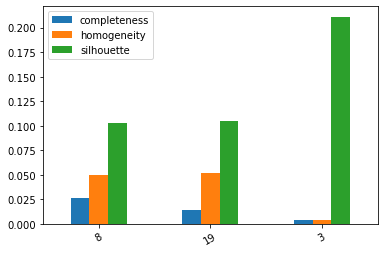

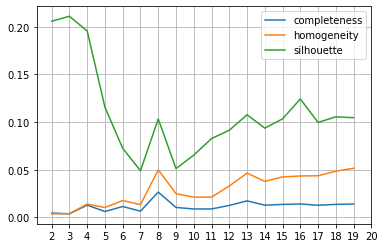

In [17]:
######################### K MEANS ###############################
dict_results = {}

x = data.values[:,2:30]
x = scale(x)
y = data.values[:,1]

res = []
for i in range(2,20):
    model_K = cluster.KMeans(n_clusters = i)
    model_K.fit(x)
    
    c = metrics.completeness_score(y,model_K.labels_)
    h = metrics.homogeneity_score(y,model_K.labels_)
    s = metrics.silhouette_score(x,model_K.labels_)
    res.append([i,c,h,s])

    dict_results[i] = { 'completeness' : c,
                        'homogeneity' : h,
                        'silhouette' : s,
        
    }
    
    ## Find maximum
## COMPLETENESS    
maxV = 0 
maxI = -1
MAXx = []
for i in range (0,len(res)):
    if (res[i][1] > maxV):
        maxV = res[i][1]
        maxI = i
print('Max completeness score: ', res[maxI] )   
MAXx.append(res[maxI])


##HOOGENEITY
maxV = 0 
maxI = -1
for i in range (0,len(res)):
    if (res[i][2] > maxV):
        maxV = res[i][2]
        maxI = i
print('Max homogeneity score: ', res[maxI] )  
MAXx.append(res[maxI])

##SILHOUETTE
maxV = 0 
maxI = -1
for i in range (0,len(res)):
    if (res[i][3] > maxV):
        maxV = res[i][3]
        maxI = i
print('Max silhouette score: ', res[maxI] )  
MAXx.append(res[maxI])


dato ={'completeness': [MAXx[0][1], MAXx[1][1],MAXx[2][1]],
       'homogeneity' : [MAXx[0][2], MAXx[1][2],MAXx[2][2]],
       'silhouette'  : [MAXx[0][3], MAXx[1][3],MAXx[2][3]] }

frame = pd.DataFrame(dato)
clus1 = MAXx[0][0]
clus2 = MAXx[1][0]
clus3 = MAXx[2][0]
nombres = (clus1,clus2,clus3)
frame.plot.bar().set_xticklabels(nombres,rotation = 30)
plt.show()


## line plot
num = np.arange(2,21) 
kmeansresults = pd.DataFrame(dict_results).T
kmeansresults.plot(grid = True).set_xticks(num)
plt.show()


In [5]:
############### FUNCION para guardar los valores ########################

def print_metrics(y_true, y_pred):
    
    accuracy = metrics.accuracy_score(y_true, y_pred)
    f1 = metrics.f1_score(y_true, y_pred)
    precision = metrics.precision_score(y_true, y_pred)
    recall = metrics.recall_score(y_true, y_pred)

    return {
        'accuracy': accuracy,
        'f1': f1,
        'precision': precision,
        'recall': recall,
    }

LogisticRegression()

Classification report:
               precision    recall  f1-score   support

         0.0       0.64      0.59      0.61       153
         1.0       0.57      0.62      0.59       133

    accuracy                           0.60       286
   macro avg       0.60      0.60      0.60       286
weighted avg       0.60      0.60      0.60       286

Confusion matrix:

[[90 63]
 [51 82]]
0.5655172413793104


/Users/clau/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


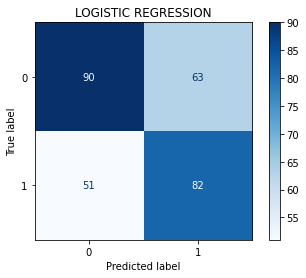

KNeighborsClassifier()

Classification report:
               precision    recall  f1-score   support

         0.0       0.61      0.55      0.58       153
         1.0       0.53      0.59      0.56       133

    accuracy                           0.57       286
   macro avg       0.57      0.57      0.57       286
weighted avg       0.57      0.57      0.57       286

Confusion matrix:

[[84 69]
 [54 79]]
0.5337837837837838


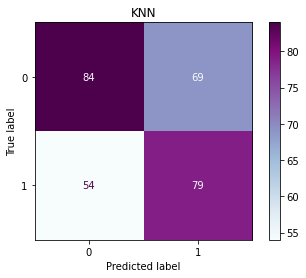


Classification report:
               precision    recall  f1-score   support

         0.0       0.64      0.61      0.63       153
         1.0       0.58      0.61      0.59       133

    accuracy                           0.61       286
   macro avg       0.61      0.61      0.61       286
weighted avg       0.61      0.61      0.61       286

Confusion matrix:

[[94 59]
 [52 81]]
0.5785714285714286


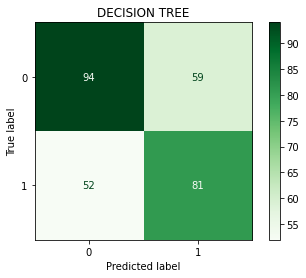

GaussianNB()

Classification report:
               precision    recall  f1-score   support

         0.0       0.67      0.31      0.42       153
         1.0       0.51      0.83      0.63       133

    accuracy                           0.55       286
   macro avg       0.59      0.57      0.53       286
weighted avg       0.60      0.55      0.52       286

Confusion matrix:

[[ 47 106]
 [ 23 110]]
0.5092592592592593


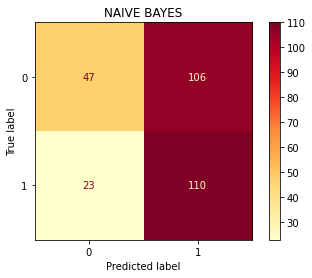

RECALL:  0.8270676691729323


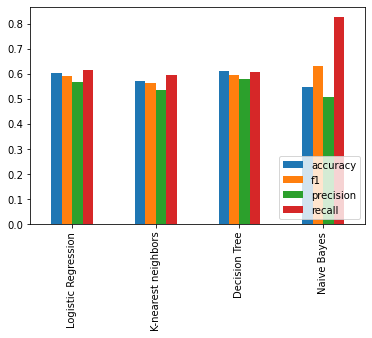

,Logistic Regression,K-nearest neighbors,Decision Tree,Naive Bayes
accuracy,0.601399,0.569930,0.611888,0.548951
f1,0.589928,0.562278,0.593407,0.630372
precision,0.565517,0.533784,0.578571,0.509259
recall,0.616541,0.593985,0.609023,0.827068


In [8]:
################################## SUPERVISED LEARNING ##################################
import sklearn.model_selection

y = data.values[:,1]
x = data.values[:,2:31] 


dict_results = {}

#Segment the data in a training and test set with a 70/30 split
xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(x, y, test_size = 0.30)

############################# Logistic regression ######################################

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(xtrain,ytrain)
##PROBA?

print(model)
ypred = model.predict(xtest)

## predictions
print("\nClassification report:\n", metrics.classification_report(ytest,ypred))
print("Confusion matrix:\n")
print(metrics.confusion_matrix(ytest,ypred))

print(sklearn.metrics.precision_score(ytest,ypred))
class_names = (0,1)
#sklearn.metrics.plot_confusion_matrix(model,xtest,ytest)
sklearn.metrics.plot_confusion_matrix(model,xtest,ytest,display_labels=class_names,cmap=plt.cm.Blues)
## to choose more colormaps: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

plt.title('LOGISTIC REGRESSION')
plt.show()



dict_results['Logistic Regression'] = print_metrics(ytest, ypred)

############################## K NEAREST NEIGHBORS ##############################
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier()
#model2 = KNeighborsClassifier(weights = 'distance')
model2.fit(xtrain,ytrain)

print(model2)
ypred = model2.predict(xtest)

## predictions
print("\nClassification report:\n", metrics.classification_report(ytest,ypred))
print("Confusion matrix:\n")
print(metrics.confusion_matrix(ytest,ypred))


print(sklearn.metrics.precision_score(ytest,ypred))
class_names = (0,1)
#sklearn.metrics.plot_confusion_matrix(model,xtest,ytest)
sklearn.metrics.plot_confusion_matrix(model2,xtest,ytest,display_labels=class_names,cmap=plt.cm.BuPu)
## to choose more colormaps: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

plt.title('KNN')
plt.show()


dict_results['K-nearest neighbors'] = print_metrics(ytest, ypred)
############################## DECISION TREEEE ##############################

from sklearn.tree import DecisionTreeClassifier

model3 = DecisionTreeClassifier()
model3.fit(xtrain,ytrain)


ypred = model3.predict(xtest)

## predictions
print("\nClassification report:\n", metrics.classification_report(ytest,ypred))
print("Confusion matrix:\n")
print(metrics.confusion_matrix(ytest,ypred))


print(sklearn.metrics.precision_score(ytest,ypred))
class_names = (0,1)
#sklearn.metrics.plot_confusion_matrix(model,xtest,ytest)
sklearn.metrics.plot_confusion_matrix(model3,xtest,ytest,display_labels=class_names,cmap=plt.cm.Greens)
## to choose more colormaps: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

plt.title('DECISION TREE')
plt.show()


dict_results['Decision Tree'] = print_metrics(ytest, ypred)
################################### NAIVE BAYES ####################################


from sklearn.naive_bayes import GaussianNB


model4 =  GaussianNB()
model4.fit(xtrain,ytrain)

print(model4)
ypred = model4.predict(xtest)

## predictions
print("\nClassification report:\n", metrics.classification_report(ytest,ypred))
print("Confusion matrix:\n")
print(metrics.confusion_matrix(ytest,ypred))





print(sklearn.metrics.precision_score(ytest,ypred))
class_names = (0,1)
#sklearn.metrics.plot_confusion_matrix(model,xtest,ytest)
sklearn.metrics.plot_confusion_matrix(model4,xtest,ytest,display_labels=class_names,cmap=plt.cm.YlOrRd)
## to choose more colormaps: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

plt.title('NAIVE BAYES')
plt.show()
print('RECALL: ',metrics.recall_score(ytest, ypred))

dict_results['Naive Bayes'] = print_metrics(ytest, ypred)


############## final comparison table #################
supT = pd.DataFrame(dict_results).T
sup = pd.DataFrame(dict_results)


## este es el plot que quiero
supT
supT.plot.bar()
plt.legend(loc = 'lower right')
plt.show()

## y esta tabla
sup